In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
# File path of the JSON file
file_path1 = 'drive/My Drive/Projects/LSE-Symptomatology/Data/PrimaryLabeled_Dataset(Post)'

In [ ]:
# File path of the JSON file
file_path2 = 'drive/My Drive/Projects/LSE-Symptomatology/Data/PrimaryLabeled_Dataset(Comment)'

In [ ]:
# Load the JSON data from the file
data_submission = []

with open(file_path1, 'r') as file:
    for line in file:
        data_submission.append(json.loads(line))

In [ ]:
# Convert the list of dictionaries to a DataFrame
df_submission = pd.DataFrame(data_submission)

In [ ]:
df_submission.head()

,postID,authorID,date,flairName,title,post,num_comments,score,upvote,downvote
0,cx393,[deleted],2010-08-04 02:25:45,None,Question about weight loss and PCOS.,"I'm 26, and can't afford health insurance for ...",6,8,NaN,NaN
1,cxl3p,improbablywrong,2010-08-05 05:16:03,None,Progesterone cream - do you use it?,I think this is a great treatment for PCOS. Id...,1,5,NaN,NaN
2,dd89k,hgielrehtaeh,2010-09-13 15:16:16,None,"Really, really, REALLY struggling with my inab...",I've had 7 cousins have babies in the last two...,8,7,NaN,NaN
3,ds0n2,cisforcourtney,2010-10-16 11:19:46,None,Question About Clothing,I recently gained some weight and it seems lik...,9,7,NaN,NaN
4,dylgr,GuiltEngine,2010-10-30 05:40:06,None,PCOS and hair loss,"Hallo there, very specialized subreddit that I...",0,1,NaN,NaN


In [ ]:
len(df_submission)

59962

In [ ]:
# Load the JSON data from the file
data_comments = []

with open(file_path2, 'r') as file:
    for line in file:
        data_comments.append(json.loads(line))

In [ ]:
# Convert the list of dictionaries to a DataFrame
df_comments = pd.DataFrame(data_comments)

In [ ]:
df_comments.head()

,commentID,authorID,date,comment,parentID,linkID
0,c0uubmc,improbablywrong,2010-07-21 22:15:28,"I've tried several items on this list, like Me...",t3_cs80y,t3_cs80y
1,c0ux9q2,emmster,2010-07-22 20:41:36,"I eat a generally lower carb diet (That's ""die...",t3_cs80y,t3_cs80y
2,c0uxcw1,vixiera,2010-07-22 21:13:36,"I self-diagnosed myself a few years ago, but I...",t3_cs80y,t3_cs80y
3,c0uxxpr,improbablywrong,2010-07-23 00:55:28,"I haven't visited their forum for a while, but...",t3_csm11,t3_csm11
4,c0uy2d1,Amberkins72187,2010-07-23 01:48:48,I have had that site bookmarked forever. I hav...,t3_csm11,t3_csm11


In [ ]:
len(df_comments)

641441

In [ ]:
# Define the symptoms and their variations
symptoms ={'irregular periods': ['irregular periods',
  'irregular bleeding',
  'irregular menstrual cycles',
  'irregular cycles',
  'irregular period',
  'abnormal periods',
  'inconsistent periods',
  'frequent periods',
  'period irregularity',
  'very irregular periods',
  'extremely irregular periods',
  'unpredictable periods',
  'regular periods',
  'irregular menstrual cycle',
  'irregular menstruation',
  'irregular menses',
  'irregular cycle'],
 'no period': ['absent periods',
  'absence of menstruation',
  'missed period',
  'missing periods',
  'missing period',
  'absence of period',
  'lack of periods',
  'infrequent periods',
  'no period',
  'amenorrhea',
  'absence of periods',
  'missed periods',
  'late period',
  'no periods'],
 'heavy periods': ['heavy periods',
  'heavy bleeding',
  'heavy flow',
  'long periods',
  'heavy period',
  'prolonged periods',
  'prolonged period',
  'prolonged bleeding'],
 'blood clots': ['blood clots'],
 'brown discharge': ['brown discharge', 'brown spotting'],
 'spotting': ['spotting', 'spots'],
 'painful periods': ['painful periods',
  'period pain',
  'painful period',
  'terrible periods',
  'pain during periods',
  'horrible periods'],
 'night sweats': ['night sweats', 'sweating', 'hot flashes'],
 'hirsutism': ['hirsutism',
  'hirtuism',
  'hirituism',
  'hirutism',
  'hirsuitism',
  'excess body hair',
  'excess hair',
  'excess hair growth',
  'abnormal hair growth',
  'unwanted hair growth',
  'excessive hair growth',
  'facial hair',
  'hair on face',
  'body hair',
  'hair growth',
  'facial hair growth',
  'chin hair',
  'chin hairs'],
 'hair loss': ['hair loss',
  'hair thinning',
  'balding',
  'baldness',
  'hair falling out',
  'hair fall',
  'thinning hair',
  'receding hairline',
  'thin hair'],
 'high androgen levels': ['high androgen levels',
  'high androgens',
  'elevated androgens',
  'high androstenedione'],
 'high testosterone': ['high testosterone',
  'high levels of testosterone',
  'elevated testosterone'],
 'high dheas': ['high dheas',
  'high dhea-s',
  'high dhea-s',
  'high dhea',
  'elevated dhea-s',
  'dheas'],
 'hormonal imbalance': ['hormonal imbalance',
  'hormone imbalance',
  'hormonal imbalances',
  'hormone imbalances'],
 'high estrogen': ['high estrogen', 'estrogen dominance'],
 'low estrogen': ['low estrogen'],
 'high lh levels': ['high lh levels'],
 'high prolactin': ['high prolactin'],
 'weight gain': ['weight gain',
  'difficulty losing weight',
  'obese',
  'obesity',
  'overweight',
  'weight issues',
  'trouble losing weight',
  'weight fluctuations',
  'inability to lose weight',
  'weight problems',
  'weight fluctuation',
  'weight struggles',
  'weight management'],
 'belly fat': ['belly fat'],
 'weight loss': ['weight loss'],
 'hunger/loss of appetite': ['hunger',
  'loss of appetite',
  'increased appetite',
  'no appetite'],
 'frequent urination': ['frequent urination', 'increased urination'],
 'inflammation': ['inflammation'],
 'hypothyroidism': ['hypothyroidism',
  'thyroid issues',
  'hypothyroid',
  'thyroid'],
 'diabetes': ['diabetes',
  'low blood sugar',
  'pre-diabetic',
  'hypoglycemia',
  'prediabetes',
  'prediabetic',
  'pre-diabetes'],
 'insulin resistance': ['insulin resistance',
  'insulin resistant',
  'ir (insulin resistance)'],
 'high cholesterol': ['high cholesterol',
  'high triglycerides',
  'high ldl cholesterol'],
 'high insulin levels': ['high insulin levels',
  'high glucose',
  'high insulin',
  'high glucose'],
 'cysts on ovaries': ['cysts on ovaries',
  'enlarged ovary',
  'polycystic ovary',
  'enlarged ovaries',
  'cyst',
  'cysts',
  'follicles',
  'ovarian cysts',
  'polycystic ovaries',
  'cysts in ovaries',
  'cystic ovaries',
  'ovarian cyst',
  'cyst on ovary'],
 'endometriosis': ['endometriosis', 'endometrioma'],
 'cramps': ['cramps', 'cramping'],
 'pelvic pain': ['pelvic pain'],
 'ovary pain': ['ovary pain', 'ovarian pain', 'pain in ovaries'],
 'back pain': ['back pain', 'leg pain'],
 'abdominal pain': ['abdominal pain', 'pain in lower abdomen'],
 'low libido': ['low libido', 'low sex drive', 'decreased libido'],
 'infertility': ['infertility',
  'fertility issues',
  'infertility problems',
  'fertility'],
 'ovulation/annovulation': ['ovulation', 'anovulation', 'ovulation issues'],
 'pain during sex': ['pain during sex',
  'painful sex',
  'pain during intercourse'],
 'acne': ['acne', 'breakouts', 'pimples'],
 'dry skin': ['dry skin'],
 'redness': ['redness', 'red marks', 'red spots'],
 'skin tags': ['skin tags'],
 'stretch marks': ['stretch marks'],
 'skin issues': ['skin issues',
  'hyperpigmentation',
  'itching',
  'scars',
  'eczema',
  'rosacea',
  'sensitive skin'],
 'acanthosis nigricans': ['acanthosis nigricans', 'dark spots'],
 'oily skin': ['oily skin'],
 'mood swings': ['mood swings', 'anxiety', 'depression', 'feeling sick'],
 'insomnia': ['insomnia',
  'sleep apnea',
  'trouble sleeping',
  'sleep disturbances',
  'poor sleep',
  'sleep issues',
  'snoring'],
 'brain fog': ['brain fog', 'foggy head'],
 'nausea': ['nausea', 'nauseated', 'nauseous'],
 'bloating': ['bloating', 'bloated', 'bloat'],
 'vomiting': ['vomiting', 'vomit'],
 'constipation': ['constipation'],
 'stomach pain': ['stomach pain', 'stomach issues'],
 'digestive issues': ['digestive issues',
  'gut issues',
  'indigestion',
  'gluten intolerance'],
 'anemia': ['anemia', 'low iron', 'iron deficiency', 'low ferritin'],
 'pain': ['pain', 'discomfort', 'pains'],
 'dizziness': ['dizziness', 'lightheadedness', 'dizzy', 'fainting'],
 'headaches': ['headaches', 'migraines', 'headache', 'migraine'],
 'fatigue': ['fatigue',
  'tiredness',
  'weakness',
  'low energy',
  'exhaustion',
  'fatigued'],
 'cravings': ['cravings', 'sugar cravings'],
 'breast tenderness': ['breast tenderness',
  'sore breasts',
  'breast pain',
  'sore nipples']}


In [ ]:
import re

def check_symptoms(text, symptom_list):
    text = text.lower()  # Lowercasing the text for case-insensitive matching
    occurrences = []
    for symptom in symptom_list:
        # Adjusting the regular expression to match both singular and plural forms
        # For symptoms like "fever" without a plural 's', it still matches correctly.
        pattern = r'\b' + re.escape(symptom.rstrip('s')) + r's?\b'
        if re.search(pattern, text):
            occurrences.append(symptom)
    return occurrences


In [ ]:
# Initialize the co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(0, index=symptoms, columns=symptoms)


In [ ]:
def update_co_occurrence_matrix(text, co_occurrence_matrix, symptoms):
    found_symptoms = check_symptoms(text, symptoms)
    for i in found_symptoms:
        for j in found_symptoms:
            co_occurrence_matrix.loc[i, j] += 1

In [ ]:
# Update co-occurrence matrix for all submissions
for _, row in df_submission.iterrows():
    text = row.get('title', '') + " " + row.get('post', '')
    update_co_occurrence_matrix(text, co_occurrence_matrix, symptoms)

In [ ]:


# Update co-occurrence matrix for all comments
for _, row in df_comments.iterrows():
    text = row.get('comment', '')
    update_co_occurrence_matrix(text, co_occurrence_matrix, symptoms)


In [ ]:
co_occurrence_matrix

,irregular periods,no period,heavy periods,blood clots,brown discharge,spotting,painful periods,night sweats,hirsutism,hair loss,...,constipation,stomach pain,digestive issues,anemia,pain,dizziness,headaches,fatigue,cravings,breast tenderness
irregular periods,8955,302,158,71,18,353,147,13,1055,0,...,36,13,26,42,931,0,131,359,181,0
no period,302,3951,90,34,23,341,24,5,184,0,...,13,7,2,19,435,0,67,93,85,0
heavy periods,158,90,2090,41,6,215,38,6,125,0,...,15,5,12,66,378,0,47,82,53,0
blood clots,71,34,41,1649,7,74,12,1,65,0,...,5,4,4,15,220,0,45,24,13,0
brown discharge,18,23,6,7,291,83,2,1,6,0,...,0,0,0,1,39,0,5,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dizziness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
headaches,131,67,47,45,5,112,29,17,121,0,...,45,29,58,26,553,0,3729,438,202,0
fatigue,359,93,82,24,2,112,80,32,408,0,...,83,30,38,86,772,0,438,5970,377,0
cravings,181,85,53,13,3,96,31,14,276,0,...,41,16,54,17,389,0,202,377,9397,0


In [ ]:
def identify_strongly_correlated_symptoms(co_occurrence_matrix, top_n=25):
    """
    Identifies and returns the top_n pairs of strongly correlated symptoms.
    """
    # Create a list to store symptom pairs and their co-occurrence counts
    symptom_pairs = []

    # Iterate over the matrix to extract symptom pairs and their co-occurrence counts
    for i in range(len(co_occurrence_matrix.columns)):
        for j in range(i+1, len(co_occurrence_matrix.columns)):
            symptom1 = co_occurrence_matrix.columns[i]
            symptom2 = co_occurrence_matrix.columns[j]
            count = co_occurrence_matrix.iloc[i, j]
            symptom_pairs.append((symptom1, symptom2, count))

    # Sort the list based on co-occurrence counts in descending order
    symptom_pairs.sort(key=lambda x: x[2], reverse=True)

    # Return the top_n pairs
    return symptom_pairs[:top_n]

# Example usage
top_symptom_pairs = identify_strongly_correlated_symptoms(co_occurrence_matrix, top_n=25)
for pair in top_symptom_pairs:
    print(f"Symptoms: {pair[0]} and {pair[1]}, : {pair[2]}")

Symptoms: hirsutism and acne, : 3927
Symptoms: diabetes and insulin resistance, : 3750
Symptoms: weight gain and acne, : 2959
Symptoms: irregular periods and acne, : 2734
Symptoms: cramps and pain, : 2681
Symptoms: insulin resistance and acne, : 2673
Symptoms: acne and pain, : 2253
Symptoms: weight gain and insulin resistance, : 2061
Symptoms: hirsutism and insulin resistance, : 1531
Symptoms: inflammation and insulin resistance, : 1382
Symptoms: endometriosis and pain, : 1382
Symptoms: insulin resistance and cravings, : 1262
Symptoms: irregular periods and weight gain, : 1150
Symptoms: cramps and acne, : 1090
Symptoms: irregular periods and hirsutism, : 1055
Symptoms: irregular periods and insulin resistance, : 1053
Symptoms: weight gain and pain, : 1052
Symptoms: hirsutism and weight gain, : 1045
Symptoms: acne and fatigue, : 1040
Symptoms: insulin resistance and pain, : 1025
Symptoms: acne and mood swings, : 1024
Symptoms: diabetes and acne, : 997
Symptoms: insulin resistance and fa

In [ ]:
filtered_matrix = pd.DataFrame()


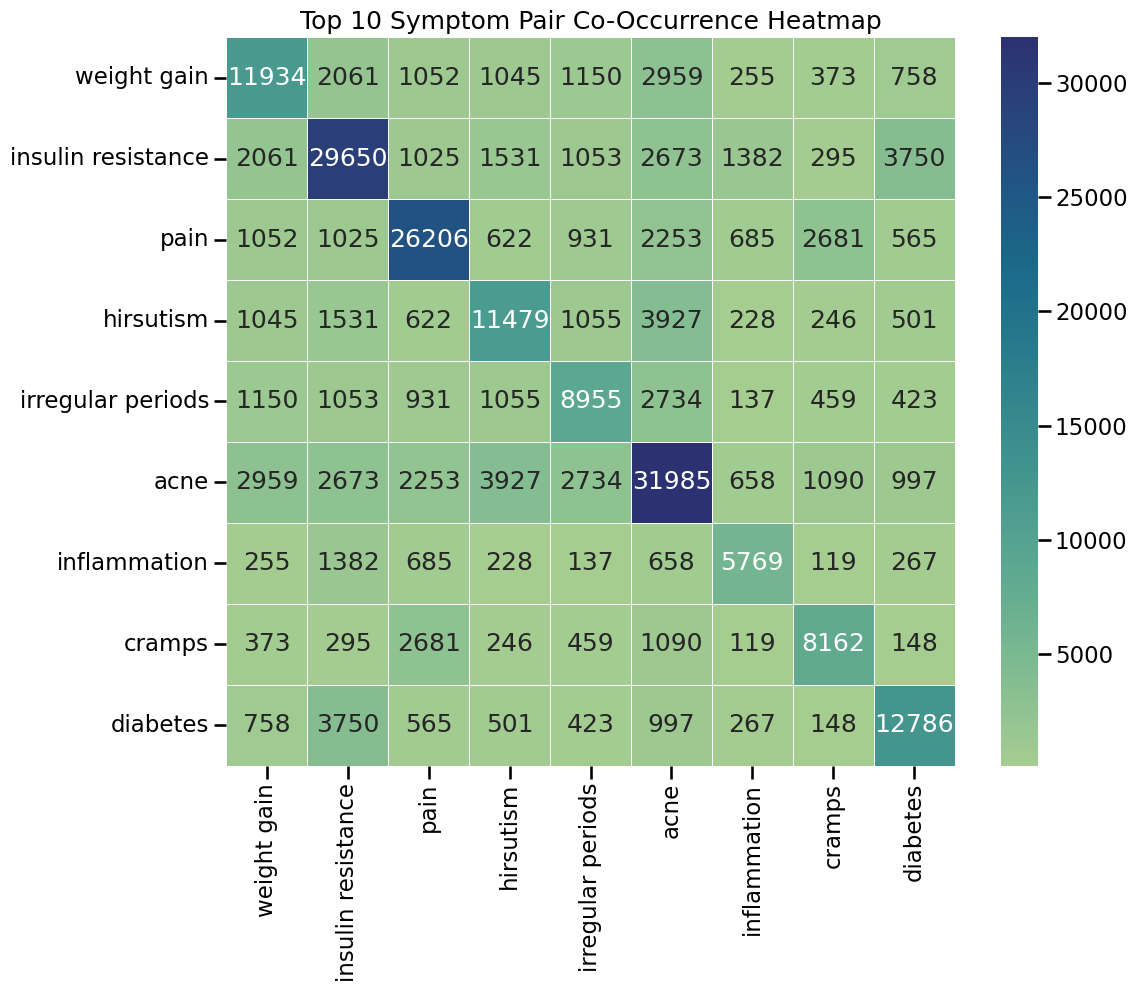

'Top_10_Symptom_Pair_Heatmap.svg'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the top 8 symptom pairs from the co-occurrence matrix
top_symptom_pairs = identify_strongly_correlated_symptoms(co_occurrence_matrix, top_n=10)

# Extract only the symptoms involved in the top pairs
top_symptoms = set()
for pair in top_symptom_pairs:
    top_symptoms.add(pair[0])
    top_symptoms.add(pair[1])

# Convert the set of top symptoms to a list for indexing
top_symptoms_list = list(top_symptoms)

# Filter the co-occurrence matrix for the top symptoms
filtered_matrix = co_occurrence_matrix.loc[top_symptoms_list, top_symptoms_list]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_matrix,
            annot=True,  # Annotate cells with co-occurrence counts
            cmap=sns.color_palette("crest", as_cmap=True),  # Use "crest" colormap
            fmt="d",  # Display values as integers
            linewidths=.5,  # Add lines between cells
            square=True)  # Keep cells square-shaped

plt.title('Top 10 Symptom Pair Co-Occurrence Heatmap')
plt.tight_layout()

# Save the heatmap as an SVG file
heatmap_file = "Top_10_Symptom_Pair_Heatmap.svg"
plt.savefig(heatmap_file, format='svg')
plt.show()

heatmap_file


In [ ]:
co_occurrence_matrix

,irregular periods,no period,heavy periods,blood clots,brown discharge,spotting,painful periods,night sweats,hirsutism,hair loss,...,constipation,stomach pain,digestive issues,anemia,pain,dizziness,headaches,fatigue,cravings,breast tenderness
irregular periods,8955,302,158,71,18,353,147,13,1055,0,...,36,13,26,42,931,0,131,359,181,0
no period,302,3951,90,34,23,341,24,5,184,0,...,13,7,2,19,435,0,67,93,85,0
heavy periods,158,90,2090,41,6,215,38,6,125,0,...,15,5,12,66,378,0,47,82,53,0
blood clots,71,34,41,1649,7,74,12,1,65,0,...,5,4,4,15,220,0,45,24,13,0
brown discharge,18,23,6,7,291,83,2,1,6,0,...,0,0,0,1,39,0,5,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dizziness,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
headaches,131,67,47,45,5,112,29,17,121,0,...,45,29,58,26,553,0,3729,438,202,0
fatigue,359,93,82,24,2,112,80,32,408,0,...,83,30,38,86,772,0,438,5970,377,0
cravings,181,85,53,13,3,96,31,14,276,0,...,41,16,54,17,389,0,202,377,9397,0


In [ ]:
filtered_matrix.index[0]

'weight gain'

In [ ]:
columns=filtered_matrix.columns[-1]

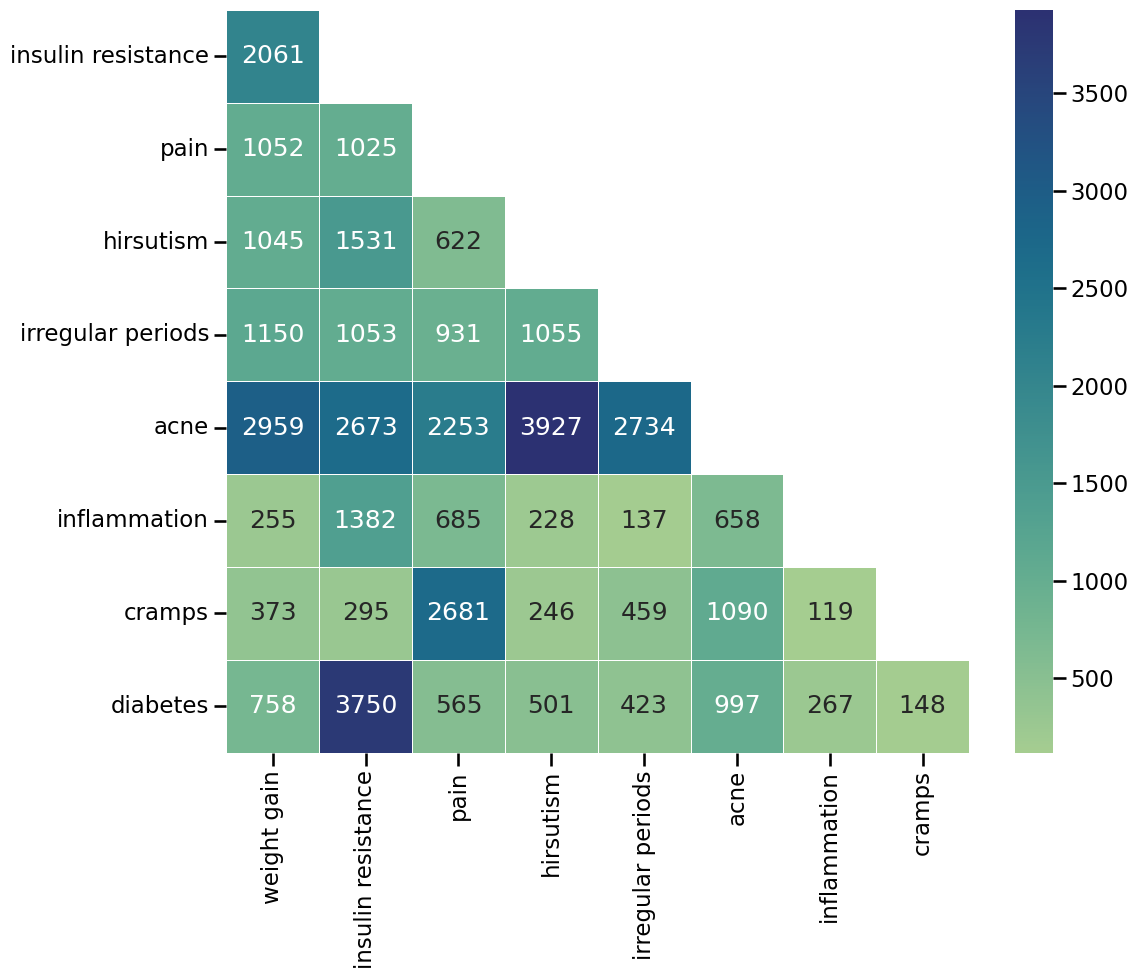

'Top_Symptom_Pair_Updated_Heatmap.svg'

In [ ]:
# Update filtered_matrix to drop 'symptom1' from Y-axis and 'symptom8' from X-axis
filtered_matrix = filtered_matrix.drop(index=filtered_matrix.index[0], errors='ignore')  # Drop 'symptom1' from rows

filtered_matrix = filtered_matrix.drop(columns=columns , errors='ignore')  # Drop 'symptom8' from columns

# Create a new mask for the updated matrix
mask = np.triu(np.ones_like(filtered_matrix, dtype=bool), k=1)
sns.set_context("talk", font_scale=1.0)
# Plot the heatmap with the updated matrix
plt.figure(figsize=(12,10))
sns.heatmap(filtered_matrix,
            mask=mask,  # Apply the mask
            annot=True,  # Annotate cells with co-occurrence counts
            cmap=sns.color_palette("crest", as_cmap=True),  # Use "crest" colormap
            fmt=".0f",  # Display values as floats
            linewidths=.5,  # Add lines between cells
            square=True,  # Keep cells square-shaped
            cbar_kws={"shrink":1})  # Shrink the colorbar for better fit
plt.xticks(rotation=90)
#plt.title('Top 8 Symptom Pair Co-Occurrence Heatmap (Excluding Symptom1 and Symptom8)')
plt.tight_layout()
# Save the heatmap as an SVG file
heatmap_updated_file = "Top_Symptom_Pair_Updated_Heatmap.svg"
plt.savefig(heatmap_updated_file, format='svg')
plt.show()

heatmap_updated_file


